In [430]:
# Necessary imports
import pandas as pd
import numpy as np
import patsy
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import pickle
from pylab import savefig

In [431]:
data_2 = pickle.load(open('cancer_cleaning.pkl', 'rb'))

In [432]:
data_2.columns

Index(['cancer_mortalities', 'diagnosed_annually', 'study_per_county',
       'geography', 'median_income', 'pct_employed', 'pct_unemployed',
       'only_private_coverage', 'only_public_covearge',
       'pct_employer_coverage', 'population_county', 'poverty_pct',
       'pct_white', 'pct_black', 'pct_asian'],
      dtype='object')

In data_2 there were many features that I won't be interested in adding to my mode, therefore i am creating a new 
data_3 to include only the features I am interested to include in the modeling 

In [433]:
data_3 = data_2[['cancer_mortalities','median_income','pct_unemployed','pct_employed', \
                 'poverty_pct','only_public_covearge','only_private_coverage','diagnosed_annually','pct_asian', \
                 'pct_black','pct_white','pct_employer_coverage']]

In [434]:
data_corr_3 = data_3.corr()

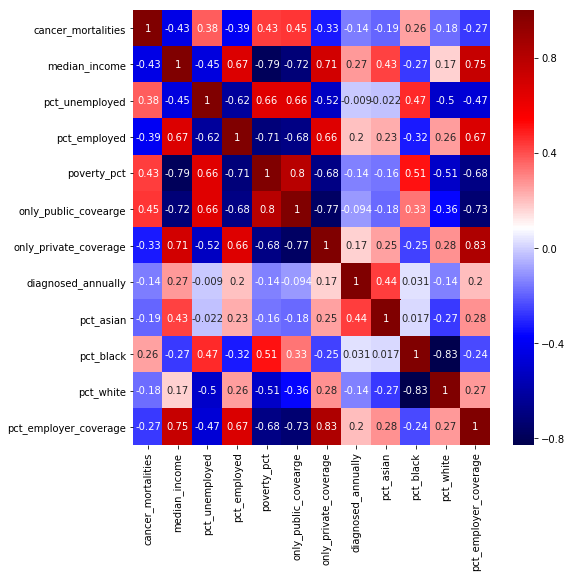

In [286]:
fig, ax = plt.subplots(figsize=(8,8))  
heatmap_cancer = sns.heatmap(data_corr_3 ,cmap= 'seismic', annot=True);


plt.savefig('myfile.png', bbox_inches = "tight")
figure = heatmap_cancer.get_figure()   
figure.savefig('svm_conf.png', dpi=400)


/Users/fahimehkhaleghi/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


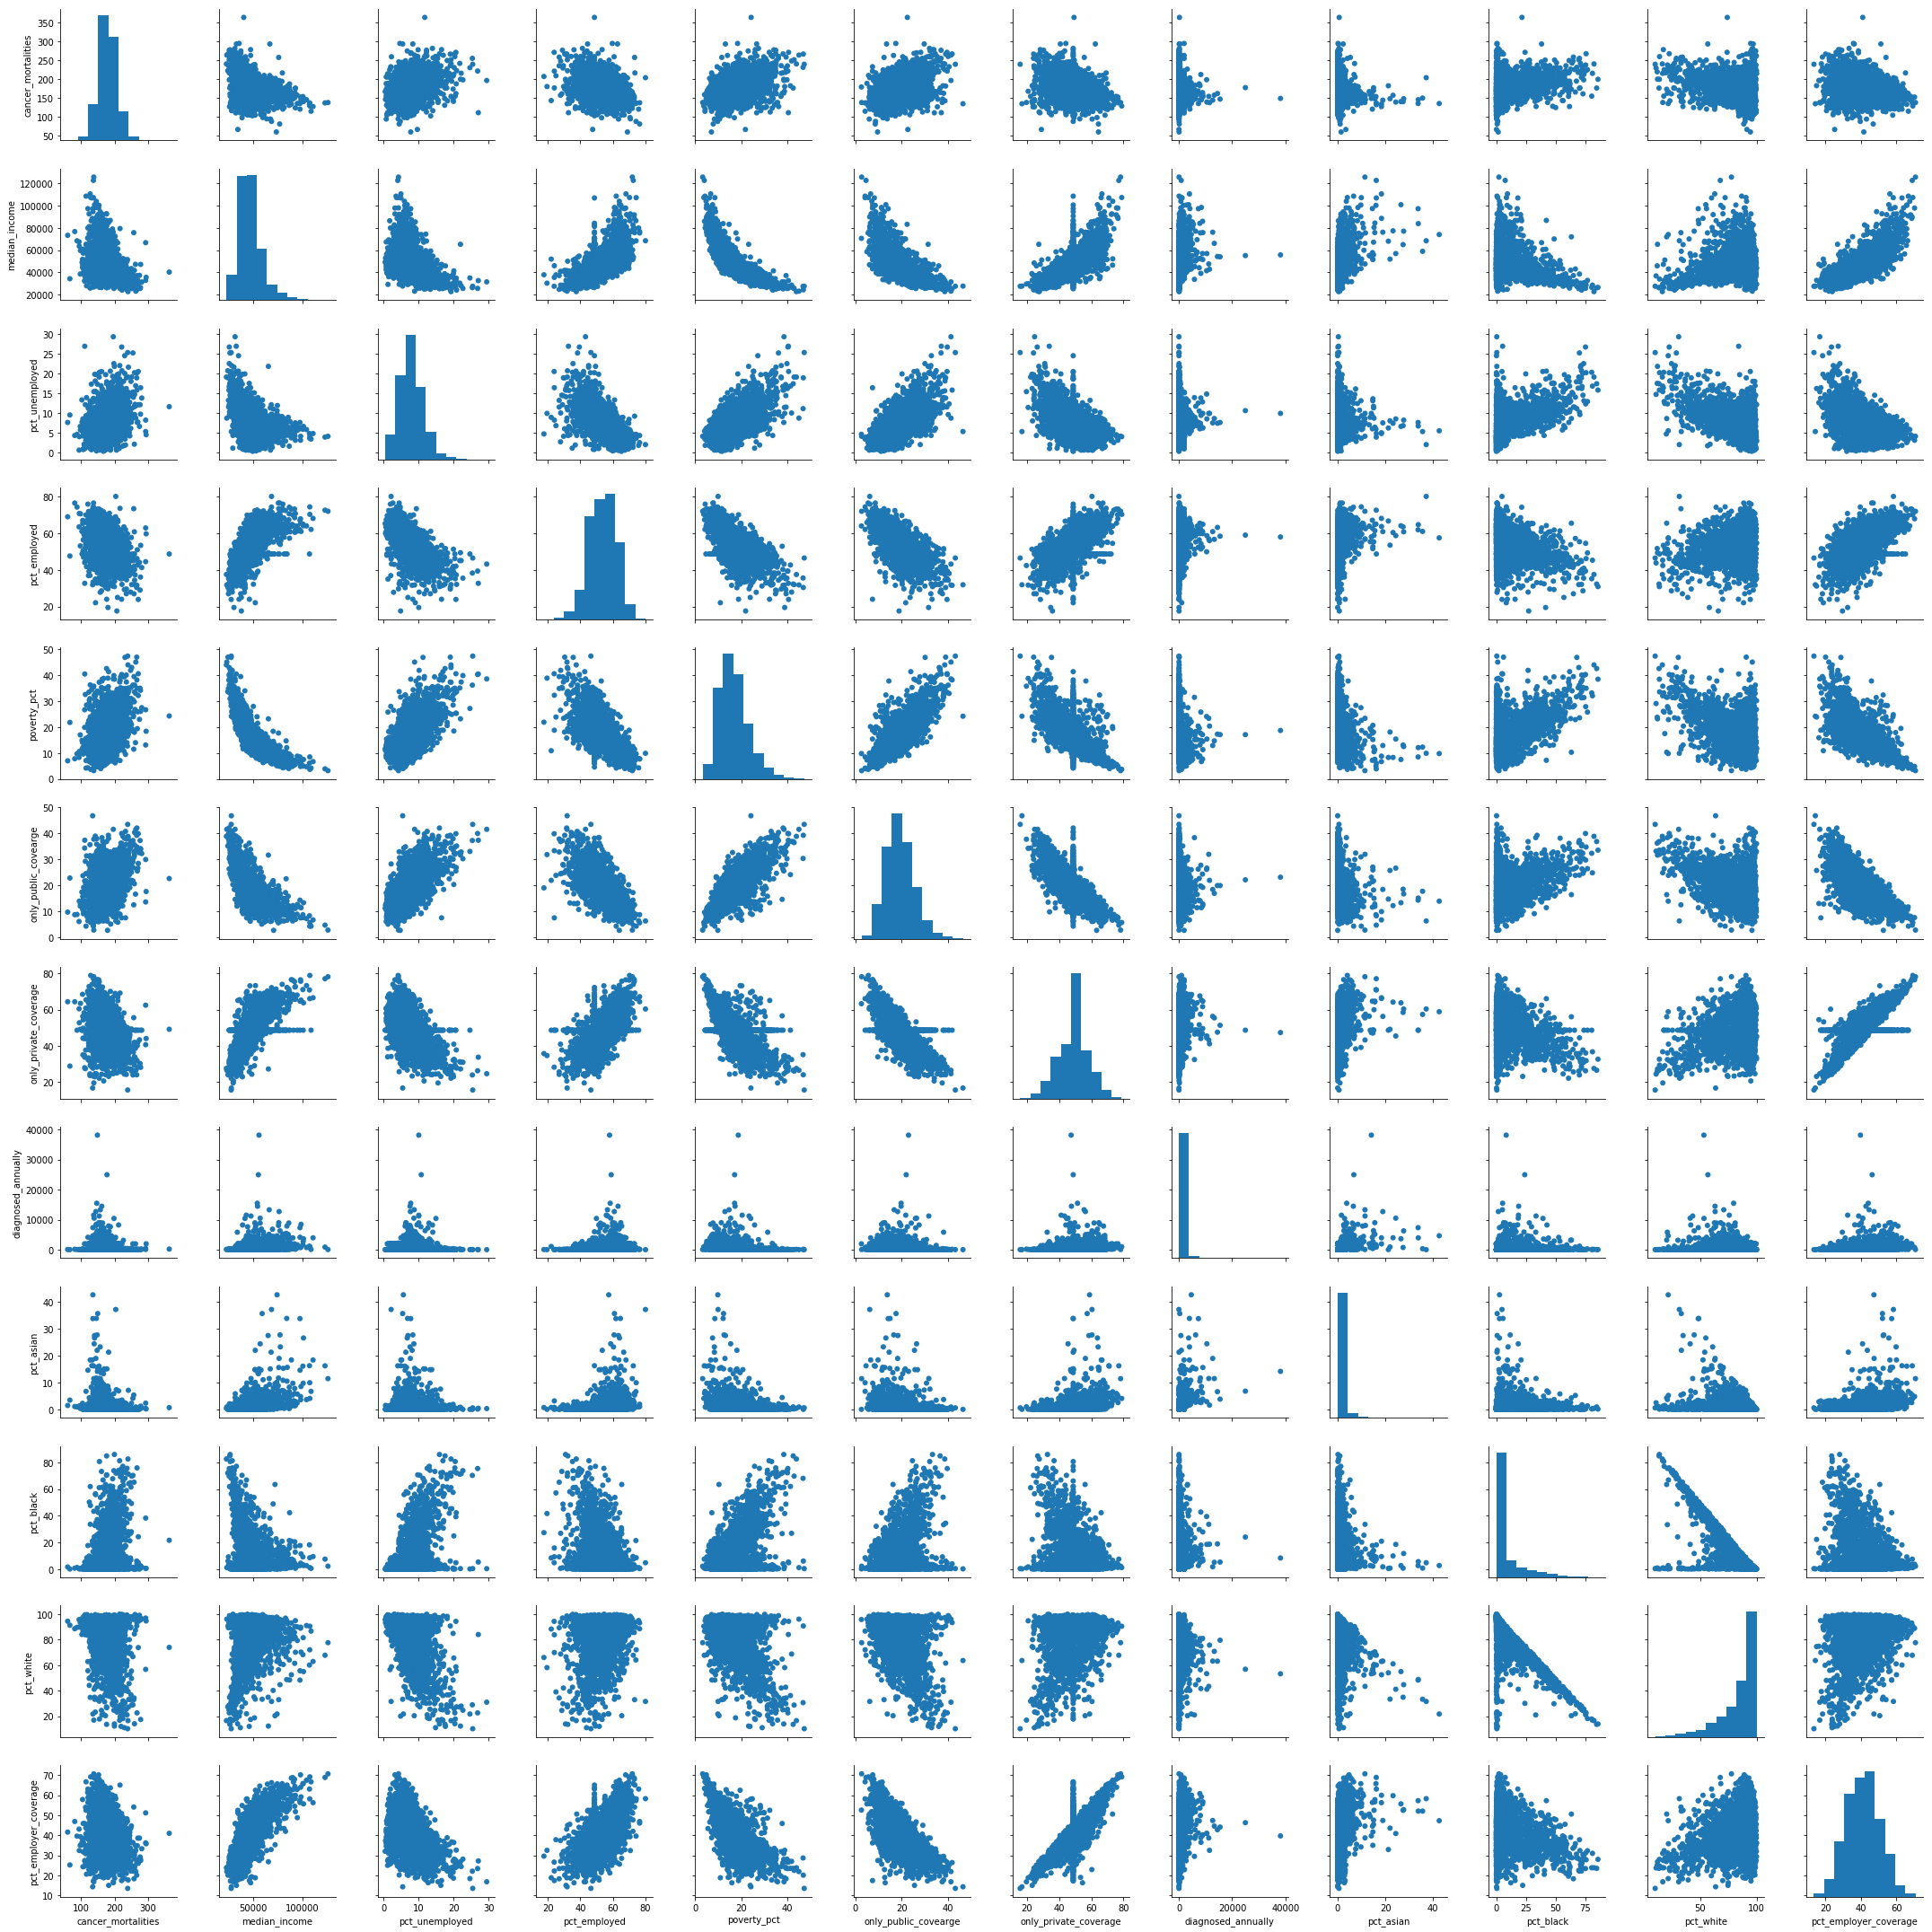

In [496]:
sns.pairplot(data_3, plot_kws=dict(alpha=1, edgecolor='none'));

In [9]:
pickle.dump(data_3, open("cancer_modeling_1.pkl", "wb" ) )

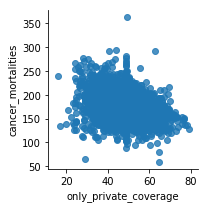

In [10]:
figure = sns.lmplot(
    x="only_private_coverage", y="cancer_mortalities", ci=None, fit_reg=False, data=data_3 ,height=3);

figure.savefig('private.png', dpi=300)

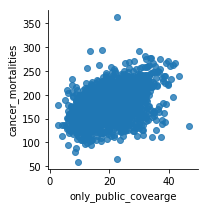

In [11]:
figure_1 = sns.lmplot(
    x="only_public_covearge", y="cancer_mortalities", ci=None, fit_reg=False, data=data_2 ,height=3);

figure_1.savefig('pulic.png', dpi=300)

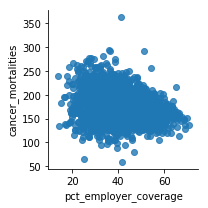

In [12]:
figure_2 = sns.lmplot(
    x="pct_employer_coverage", y="cancer_mortalities", ci=None, fit_reg=False, data=data_2 ,height=3);

figure_2.savefig('employer.png', dpi=300)

setting up the data for modeling, at first i put everything in the model but the r^ went down therefore step by step I add more feature into model to see its impact on target and the features below are the best for this model, so I decide to keep this features

# First Modeling with X

In [435]:
X =  data_3.loc[:,['pct_unemployed','pct_employer_coverage',  \
                   'only_public_covearge','only_private_coverage','pct_asian',\
                   'pct_black', 'median_income']] 

y = data_3['cancer_mortalities']

In [437]:
# fit model with target 

X = sm.add_constant(X)

cancer_model = sm.OLS(y, X, data=data_3)

results = cancer_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cancer_mortalities   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     169.2
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          7.81e-212
Time:                        09:42:49   Log-Likelihood:                -13948.
No. Observations:                3047   AIC:                         2.791e+04
Df Residuals:                    3039   BIC:                         2.796e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   140.5625      6.022     23.340      0.000     128.754     152.371
pct_unemployed            1.0769      0.177      6.097      0.000       0.731       1.423
pct_employer_coverage     0.8954      0.090      9.993      0.000       0.720       1.071
only_public_covearge      1.4249      0.135     10.579      0.000       1.161       1.689
only_private_coverage    -0.0367      0.095     -0.387      0.699      -0.223       0.149
pct_asian                -0.8574      0.187     -4.592      0.000      -1.223      -0.491
pct_black                 0.1501      0.033      4.482      0.000       0.084       0.216
median_income            -0.0007    6.3e-05    -11.187      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      178.477   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              705.549
Skew:                           0.117   Prob(JB):                    6.19e-154
Kurtosis:                       5.346   Cond. No.                     6.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Second modeling with X2

In [438]:
#above OLS result shows that by adding 'median income' into model the R^2 went up but the Condo No. went up so much 
#so there is a strong multicollinearity, I will use the log of median income!

data_3['median_income_log'] = data_3['median_income']
data_3['median_income_log'] = data_3['median_income'].map(np.log)

/Users/fahimehkhaleghi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/fahimehkhaleghi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [439]:
#bring the median_income_log and delete median_income

X2 =  data_3.loc[:,['pct_unemployed','pct_employer_coverage','only_public_covearge','only_private_coverage', \
                   'pct_asian','pct_black','median_income_log']]

y = data_3['cancer_mortalities']

In [440]:
X2 = sm.add_constant(X2)

cancer_model = sm.OLS(y, X2, data=data_3)

results = cancer_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cancer_mortalities   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          2.06e-217
Time:                        09:42:54   Log-Likelihood:                -13935.
No. Observations:                3047   AIC:                         2.789e+04
Df Residuals:                    3039   BIC:                         2.793e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   559.5357     36.427     15.360      0.000     488.111     630.961
pct_unemployed            1.0324      0.176      5.871      0.000       0.688       1.377
pct_employer_coverage     0.9442      0.090     10.528      0.000       0.768       1.120
only_public_covearge      1.2777      0.137      9.330      0.000       1.009       1.546
only_private_coverage    -0.0255      0.095     -0.270      0.787      -0.211       0.160
pct_asian                -0.8984      0.182     -4.924      0.000      -1.256      -0.541
pct_black                 0.1182      0.034      3.512      0.000       0.052       0.184
median_income_log       -42.0481      3.409    -12.334      0.000     -48.732     -35.364
==============================================================================
Omnibus:                      182.557   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.298
Skew:                           0.077   Prob(JB):                    6.57e-167
Kurtosis:                       5.450   Cond. No.                     5.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

by adding median_income_log the r^2 went up but still has a strong multicollinearity

# Third Modeling with X3

In [441]:
#above OLS result shows that by adding 'median income_log' into model the R^2 went up but the Condo No. went up so much 
#so there is a strong multicollinearity, now lets look at polynomial 'median_income'

data_3['median_income_poly'] = data_3['median_income']
data_3['median_income_poly'] = data_3['median_income'] **2

/Users/fahimehkhaleghi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/fahimehkhaleghi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [442]:
#bring the median_income_poly and delete median_income

X3 =  data_3.loc[:,['pct_unemployed','pct_employer_coverage','only_public_covearge','only_private_coverage', \
                   'pct_asian','pct_black','median_income_poly']]

y = data_3['cancer_mortalities']

In [443]:
X3 = sm.add_constant(X3)

cancer_model = sm.OLS(y, X3, data=data_3)

results = cancer_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cancer_mortalities   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          2.79e-203
Time:                        09:43:14   Log-Likelihood:                -13968.
No. Observations:                3047   AIC:                         2.795e+04
Df Residuals:                    3039   BIC:                         2.800e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   119.4854      5.644     21.171      0.000     108.419     130.551
pct_unemployed            1.0911      0.178      6.134      0.000       0.742       1.440
pct_employer_coverage     0.8031      0.089      9.024      0.000       0.629       0.978
only_public_covearge      1.6000      0.133     12.056      0.000       1.340       1.860
only_private_coverage    -0.0580      0.096     -0.607      0.544      -0.245       0.129
pct_asian                -0.9591      0.189     -5.062      0.000      -1.331      -0.588
pct_black                 0.1744      0.034      5.194      0.000       0.109       0.240
median_income_poly    -4.589e-09      5e-10     -9.178      0.000   -5.57e-09   -3.61e-09
==============================================================================
Omnibus:                      175.728   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              672.615
Skew:                           0.132   Prob(JB):                    8.78e-147
Kurtosis:                       5.287   Cond. No.                     3.58e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

strong multicollinearity

# fourth modeling with X4 

In [444]:
# Now I am going to try ploynomial for percent of unemployed over 16
data_3['pct_unemployed_poly'] = data_3['pct_unemployed']
data_3['pct_unemployed_poly'] = data_3['pct_unemployed'] **2


X4 =  data_3.loc[:,['pct_unemployed_poly','pct_employer_coverage','only_public_covearge','only_private_coverage', \
                   'pct_asian','pct_black','median_income_log']]

y = data_3['cancer_mortalities']

In [445]:
# fit model again with X4

X4 = sm.add_constant(X4)

cancer_model = sm.OLS(y, X4, data=data_3)

results = cancer_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cancer_mortalities   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          2.94e-212
Time:                        09:43:58   Log-Likelihood:                -13947.
No. Observations:                3047   AIC:                         2.791e+04
Df Residuals:                    3039   BIC:                         2.796e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   563.2705     36.572     15.402      0.000     491.561     634.980
pct_unemployed_poly       0.0272      0.008      3.234      0.001       0.011       0.044
pct_employer_coverage     0.9660      0.090     10.722      0.000       0.789       1.143
only_public_covearge      1.4519      0.134     10.864      0.000       1.190       1.714
only_private_coverage    -0.0485      0.095     -0.511      0.609      -0.234       0.137
pct_asian                -0.8244      0.183     -4.516      0.000      -1.182      -0.466
pct_black                 0.1491      0.034      4.420      0.000       0.083       0.215
median_income_log       -42.1537      3.423    -12.315      0.000     -48.865     -35.442
==============================================================================
Omnibus:                      178.426   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              737.861
Skew:                           0.065   Prob(JB):                    5.96e-161
Kurtosis:                       5.407   Cond. No.                     9.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

very strong Cond. No, not good

# Fifth modeling with X5 

In [446]:
X5 = data_3.loc[:,['pct_unemployed','pct_employer_coverage','only_public_covearge','only_private_coverage', \
                   'pct_asian','pct_black','median_income_log']]

y = data_3['cancer_mortalities']

In [447]:
# fit model again with X3

X5 = sm.add_constant(X5)

cancer_model = sm.OLS(y, X5, data=data_3)

results = cancer_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cancer_mortalities   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          2.06e-217
Time:                        09:44:39   Log-Likelihood:                -13935.
No. Observations:                3047   AIC:                         2.789e+04
Df Residuals:                    3039   BIC:                         2.793e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   559.5357     36.427     15.360      0.000     488.111     630.961
pct_unemployed            1.0324      0.176      5.871      0.000       0.688       1.377
pct_employer_coverage     0.9442      0.090     10.528      0.000       0.768       1.120
only_public_covearge      1.2777      0.137      9.330      0.000       1.009       1.546
only_private_coverage    -0.0255      0.095     -0.270      0.787      -0.211       0.160
pct_asian                -0.8984      0.182     -4.924      0.000      -1.256      -0.541
pct_black                 0.1182      0.034      3.512      0.000       0.052       0.184
median_income_log       -42.0481      3.409    -12.334      0.000     -48.732     -35.364
==============================================================================
Omnibus:                      182.557   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.298
Skew:                           0.077   Prob(JB):                    6.57e-167
Kurtosis:                       5.450   Cond. No.                     5.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Modeling with X6

In [477]:
data_3['only_public_covearge_log'] = data_3['only_public_covearge']
data_3['only_public_covearge_log'] = data_3['only_public_covearge'].map(np.log) 

In [478]:
data_3['only_private_coverage_poly'] = data_3['only_private_coverage']
data_3['only_private_coverage_poly'] = data_3['only_private_coverage']** 2

In [479]:
X6 = data_3.loc[:,['pct_employer_coverage','only_public_covearge_log','only_private_coverage_poly','median_income','pct_unemployed']]

y = data_3['cancer_mortalities']

In [480]:
# fit model again with X3

X6 = sm.add_constant(X6)

cancer_model = sm.OLS(y, X6, data=data_3)

results = cancer_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cancer_mortalities   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          1.91e-200
Time:                        09:57:08   Log-Likelihood:                -13980.
No. Observations:                3047   AIC:                         2.797e+04
Df Residuals:                    3041   BIC:                         2.801e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        112.3707      9.141     12.293      0.000      94.448     130.294
pct_employer_coverage          0.8550      0.088      9.698      0.000       0.682       1.028
only_public_covearge_log      20.7391      2.449      8.470      0.000      15.938      25.540
only_private_coverage_poly    -0.0012      0.001     -1.227      0.220      -0.003       0.001
median_income                 -0.0008   6.11e-05    -13.105      0.000      -0.001      -0.001
pct_unemployed                 1.4581      0.161      9.048      0.000       1.142       1.774
==============================================================================
Omnibus:                      177.136   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.539
Skew:                           0.163   Prob(JB):                    1.22e-142
Kurtosis:                       5.245   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Modeling with X7

In [501]:
X7 =  data_3.loc[:,['pct_unemployed','pct_employer_coverage',  \
                   'only_public_covearge','only_private_coverage','pct_asian',\
                   'pct_black']] 

y7 = data_3['cancer_mortalities']

In [502]:
# fit model again with X3

X7 = sm.add_constant(X7)

cancer_model = sm.OLS(y7, X7, data=data_3)

results = cancer_model.fit()

# summarize our model
results.summary()

/Users/fahimehkhaleghi/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cancer_mortalities   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          1.86e-186
Time:                        10:14:00   Log-Likelihood:                -14009.
No. Observations:                3047   AIC:                         2.803e+04
Df Residuals:                    3040   BIC:                         2.807e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   115.5160      5.704     20.253      0.000     104.333     126.700
pct_unemployed            1.0269      0.180      5.700      0.000       0.674       1.380
pct_employer_coverage     0.5773      0.087      6.659      0.000       0.407       0.747
only_public_covearge      1.9137      0.130     14.724      0.000       1.659       2.169
only_private_coverage    -0.1063      0.097     -1.100      0.271      -0.296       0.083
pct_asian                -1.6530      0.176     -9.386      0.000      -1.998      -1.308
pct_black                 0.1881      0.034      5.532      0.000       0.121       0.255
==============================================================================
Omnibus:                      174.840   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              699.494
Skew:                           0.085   Prob(JB):                    1.28e-152
Kurtosis:                       5.341   Cond. No.                         895.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The X7 does not give a high R^2 but it gives weak mulitcollinearity, it seems this model is the most honest one !

# Split the data into training_validation_Test using X7, y7

In [540]:
#all other feautires brought either R^2 square down or make the multicollinearity super high so I decide to keep
#X7 for further modeling, now time to make training and test split

X, X_test, y, y_test = train_test_split(X7, y7, test_size=.2, random_state=10)  
#hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [3]:
#run the Cross Validation with 5 folder

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

NameError: name 'KFold' is not defined

Ridge is unnecessary as the model is already super unfitted so ignore it and stick with Linear Regression

In [2]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

NameError: name 'lm' is not defined

In [527]:
lm.score(X,y)

0.2449009870768053

Mean squared error: 545.148


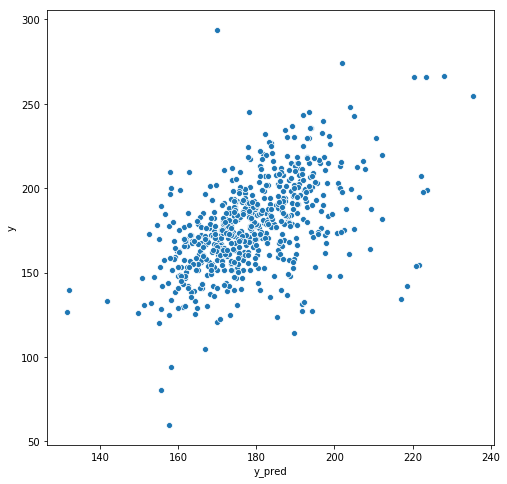

In [529]:
lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred))

error_df = pd.DataFrame()
error_df['y'] = y_test
error_df['y_pred'] = y_pred

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='y_pred', y='y', data=error_df);


In [531]:
test_set_pred = lr.predict(X_test)

In [532]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

17.356834860359523

In [542]:
# develop OLS with Sklearn
lr = LinearRegression()
fit = lr.fit(X,y)

In [547]:
# Plot your predicted values on the x-axis, and your residuals on the y-axis

# data_3['predict'] = fit.predict(X_test)
# data_3['resid'] = data_3['predict'] - y_test
# with sns.axes_style('white'):
#     plot=data_3.plot(kind='scatter',
#                   x='predict',y='resid',alpha=0.2,figsize=(10,6))

error = fit.predict(X_test) - y_test
    
    


KeyError: 'resid'

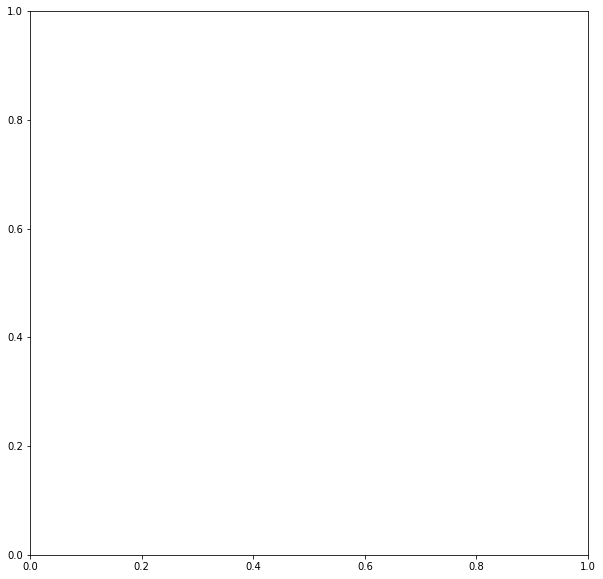

In [415]:
# diagnose/inspect residual normality using qqplot:
fig, ax = plt.subplots(figsize=(10,10))  
sns_plot = stats.probplot(data_3['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()